In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
batch_size = 32
img_height=256
img_width=256
channels=3
epochs=50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
  "trainig",
  shuffle = True,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

Found 300 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
[1 2 2 1 1 2 1 0 1 1 0 0 0 0 1 1 0 2 1 1 2 2 0 0 0 2 0 0 0 2 1 1]


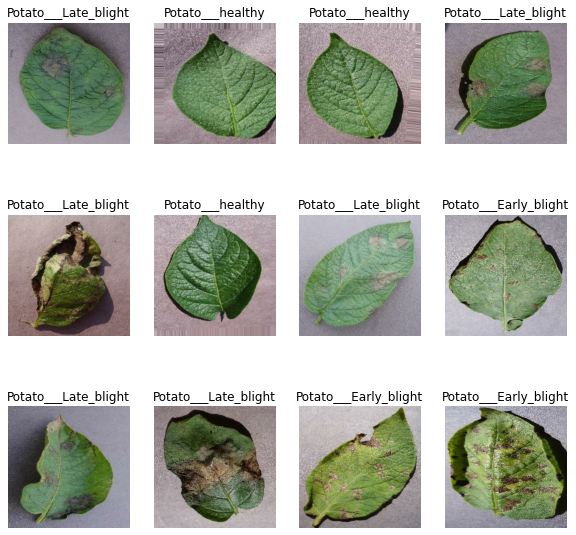

In [5]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [6]:
train_size = 0.6
len(dataset)*train_size

6.0

In [7]:
#train_ds = dataset.take(8)
#len(train_ds)

In [8]:
#test_ds = dataset.skip(8)
#len(test_ds)

In [9]:
#val_size=0.1
#len(dataset)*val_size

In [10]:
#val_ds = test_ds.take(1)
#len(val_ds)

In [11]:
#test_ds = test_ds.skip(8)
#len(test_ds)

In [12]:
#test_ds = test_ds.skip(1)
#len(test_ds)

In [13]:
def get_dataset_partition_tf(ds, train_split=0.8, val_split=0.1,test_split=0.1, shuffle=True, shuffle_size=1000):
    assert (train_split+test_split+val_split) == 1
    
    ds_size = len(ds)
     
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size).take(val_size)
    val_ds = ds.skip(train_size)  
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds 

In [14]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [15]:
len(train_ds)

1

In [16]:
len(val_ds)

2

In [17]:
len(test_ds)

1

In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.49019608 0.45490196 0.46666667]
  [0.5137255  0.47843137 0.49019608]
  [0.5176471  0.48235294 0.49411765]
  ...
  [0.5803922  0.5568628  0.57254905]
  [0.5882353  0.5647059  0.5803922 ]
  [0.58431375 0.56078434 0.5764706 ]]

 [[0.57254905 0.5372549  0.54901963]
  [0.5803922  0.54509807 0.5568628 ]
  [0.5686275  0.53333336 0.54509807]
  ...
  [0.57254905 0.54901963 0.5647059 ]
  [0.5803922  0.5568628  0.57254905]
  [0.5686275  0.54509807 0.56078434]]

 [[0.5568628  0.52156866 0.53333336]
  [0.5647059  0.5294118  0.5411765 ]
  [0.5647059  0.5294118  0.5411765 ]
  ...
  [0.5686275  0.54509807 0.56078434]
  [0.5686275  0.54509807 0.56078434]
  [0.5568628  0.53333336 0.54901963]]

 ...

 [[0.69411767 0.6745098  0.69803923]
  [0.6862745  0.6666667  0.6901961 ]
  [0.74509805 0.7254902  0.7490196 ]
  ...
  [0.6862745  0.6745098  0.7019608 ]
  [0.7137255  0.7019608  0.7294118 ]
  [0.7372549  0.7254902  0.7529412 ]]

 [[0.65882355 0.6392157  0.6627451 ]
  [0.6117647  0.5921569  0.6156863 ]


In [20]:

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(img_height, img_width),
  layers.Rescaling(1./255)
])


In [21]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [22]:
input_shape =(batch_size,img_height,img_width,channels)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3), activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
])
model.build(input_shape=input_shape)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [24]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
     metrics=['accuracy']
 )

In [25]:
history = model.fit(
    train_ds,
    batch_size=batch_size,
    validation_data=val_ds,
    verbose=1,
    epochs=epochs
)

Epoch 1/50
1/1 [==============================] - 54s 54s/step - loss: 1.1012 - accuracy: 0.2500 - val_loss: 1.0962 - val_accuracy: 0.3438
Epoch 2/50
1/1 [==============================] - 33s 33s/step - loss: 1.0857 - accuracy: 0.5000 - val_loss: 1.0970 - val_accuracy: 0.3438
Epoch 3/50
1/1 [==============================] - 21s 21s/step - loss: 1.0526 - accuracy: 0.5000 - val_loss: 1.1260 - val_accuracy: 0.3438
Epoch 4/50
1/1 [==============================] - 21s 21s/step - loss: 1.0144 - accuracy: 0.5000 - val_loss: 1.2965 - val_accuracy: 0.3438
Epoch 5/50
1/1 [==============================] - 21s 21s/step - loss: 1.0432 - accuracy: 0.5000 - val_loss: 1.2150 - val_accuracy: 0.3438
Epoch 6/50
1/1 [==============================] - 23s 23s/step - loss: 1.0080 - accuracy: 0.5000 - val_loss: 1.1458 - val_accuracy: 0.3438
Epoch 7/50
1/1 [==============================] - 21s 21s/step - loss: 1.0043 - accuracy: 0.5000 - val_loss: 1.1241 - val_accuracy: 0.3438
Epoch 8/50
1/1 [===========

In [26]:
scores = model.evaluate(test_ds)

1/1 [==============================] - 8s 8s/step - loss: 0.6951 - accuracy: 0.7188


In [27]:
scores

[0.6950811147689819, 0.71875]

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

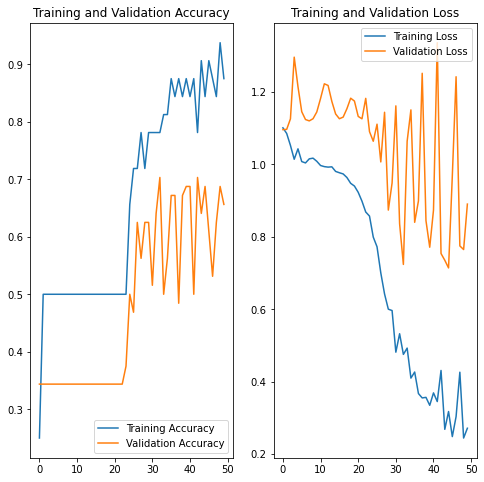

In [30]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___healthy
predicted label: Potato___Late_blight


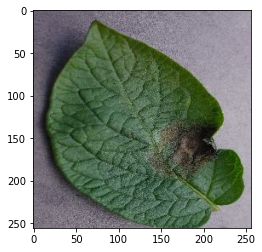

In [31]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = image_batch[i].numpy().astype('uint8')
    first_label = labels_batch[i].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[i])])
    

In [32]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

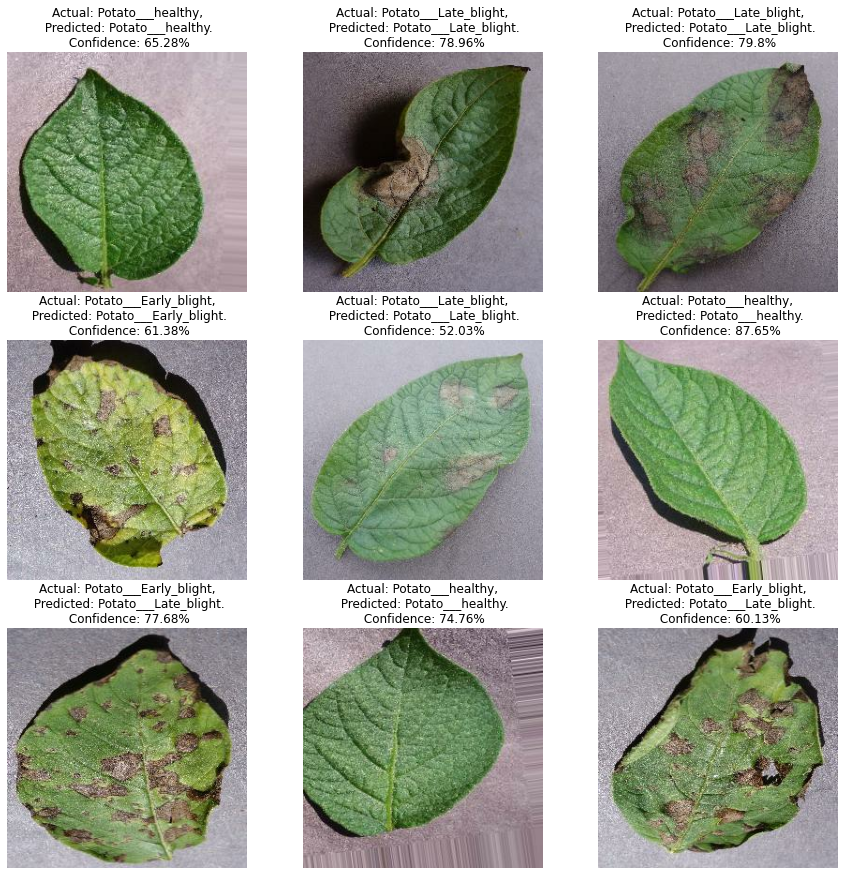

In [33]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [34]:
model.save("potatoes.h5")

In [9]:
from skimage import io,img_as_float
img = img_as_float(io.imread(trainig\Potato___Early_blight/7227b3db-c212-4370-8b42-443eea1577aa___RS_Early.B 7306.JPG as_gray= True))

SyntaxError: unexpected character after line continuation character (Temp/ipykernel_5548/982416883.py, line 2)

In [7]:
import numpy as np
kernel = np.ones((5,5), np.float32)/25